In [28]:
import pandas as pd

pd.options.display.max_columns=9999

df = pd.read_csv('owid-covid-data.csv')
print(pd.options.display.max_columns)

print(df.head(10))
print(df.columns)

#identify missing values
print(df.isnull().sum())


9999
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   
5      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
6      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
7      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
8      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
9      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           0.0         0.0                  NaN   
1                 NaN           0.0         0.0

Data for Kenya, USA, INDIA

In [29]:
df = df[(df['location'] == 'Kenya') | (df['location'] == 'United States') | (df['location'] == 'India')]
print(df.head(10))

      iso_code continent location        date  total_cases  new_cases  \
18696      IND      Asia    India  2019-12-31          0.0        0.0   
18697      IND      Asia    India  2020-01-01          0.0        0.0   
18698      IND      Asia    India  2020-01-02          0.0        0.0   
18699      IND      Asia    India  2020-01-03          0.0        0.0   
18700      IND      Asia    India  2020-01-04          0.0        0.0   
18701      IND      Asia    India  2020-01-05          0.0        0.0   
18702      IND      Asia    India  2020-01-06          0.0        0.0   
18703      IND      Asia    India  2020-01-07          0.0        0.0   
18704      IND      Asia    India  2020-01-08          0.0        0.0   
18705      IND      Asia    India  2020-01-09          0.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
18696                 NaN           0.0         0.0                  NaN   
18697                 NaN           0.0     

In [30]:
df = df.dropna(subset=['date'])
print(df)

      iso_code      continent       location        date  total_cases  \
18696      IND           Asia          India  2019-12-31          0.0   
18697      IND           Asia          India  2020-01-01          0.0   
18698      IND           Asia          India  2020-01-02          0.0   
18699      IND           Asia          India  2020-01-03          0.0   
18700      IND           Asia          India  2020-01-04          0.0   
...        ...            ...            ...         ...          ...   
42372      USA  North America  United States  2020-09-15    6554820.0   
42373      USA  North America  United States  2020-09-16    6606293.0   
42374      USA  North America  United States  2020-09-17    6630891.0   
42375      USA  North America  United States  2020-09-18    6674458.0   
42376      USA  North America  United States  2020-09-19    6724667.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
18696        0.0                 NaN           0.0       

Convert date to datetime

In [31]:
df['date'] = pd.to_datetime(df['date'])
print(df)

      iso_code      continent       location       date  total_cases  \
18696      IND           Asia          India 2019-12-31          0.0   
18697      IND           Asia          India 2020-01-01          0.0   
18698      IND           Asia          India 2020-01-02          0.0   
18699      IND           Asia          India 2020-01-03          0.0   
18700      IND           Asia          India 2020-01-04          0.0   
...        ...            ...            ...        ...          ...   
42372      USA  North America  United States 2020-09-15    6554820.0   
42373      USA  North America  United States 2020-09-16    6606293.0   
42374      USA  North America  United States 2020-09-17    6630891.0   
42375      USA  North America  United States 2020-09-18    6674458.0   
42376      USA  North America  United States 2020-09-19    6724667.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
18696        0.0                 NaN           0.0         0.0   
186

Handle missing numeric values with fillna() or interpolate().

In [32]:

# Fill missing values using interpolate for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].interpolate()

# Alternatively, you could use fillna(0) or fillna(method='ffill') etc.
# df[numeric_cols] = df[numeric_cols].fillna(0)

print("\nMissing values after interpolation:")
print(df.isnull().sum())


Missing values after interpolation:
iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          0
new_cases                            0
new_cases_smoothed                   6
total_deaths                         0
new_deaths                           0
new_deaths_smoothed                  6
total_cases_per_million              0
new_cases_per_million                0
new_cases_smoothed_per_million       6
total_deaths_per_million             0
new_deaths_per_million               0
new_deaths_smoothed_per_million      6
new_tests                           78
total_tests                         72
total_tests_per_thousand            72
new_tests_per_thousand              78
new_tests_smoothed                  79
new_tests_smoothed_per_thousand     79
tests_per_case                      79
positive_rate                       79
tests_units                

**Exploratory Data Analysis (EDA)**

Plot total cases over time for selected countries.

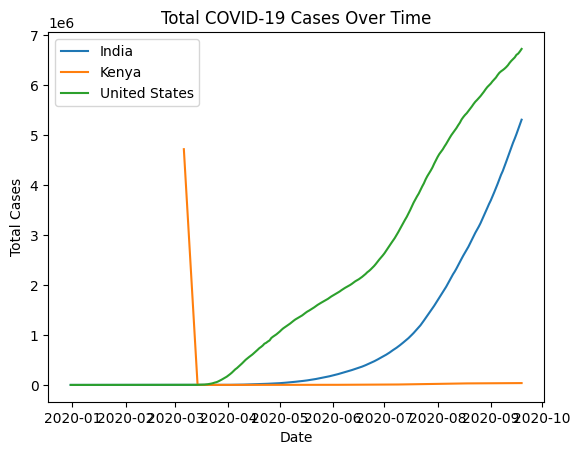

In [34]:
import matplotlib.pyplot as plt

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.show()

Plot total deaths over time.

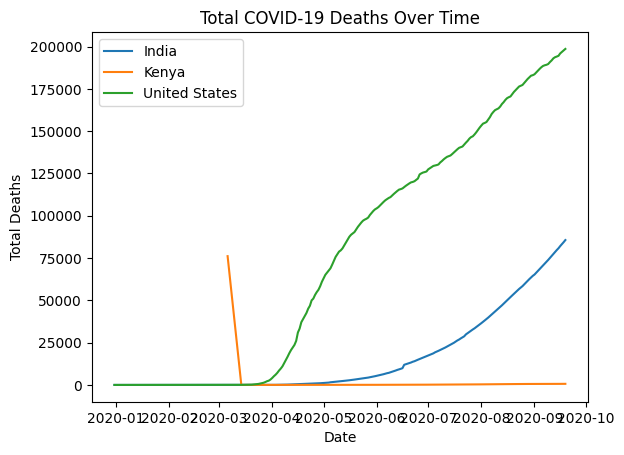

In [35]:

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.show()

Compare daily new cases between countries.

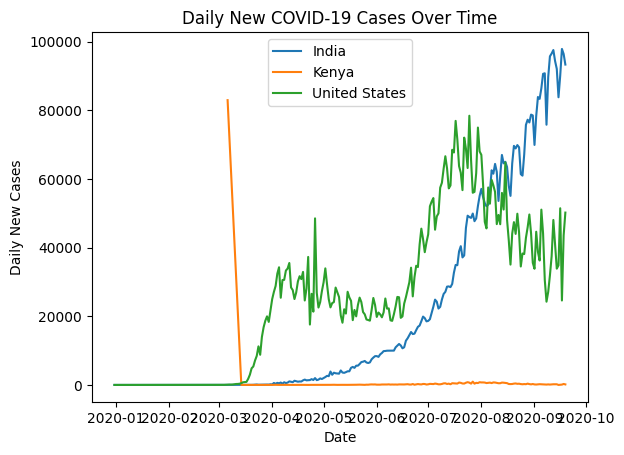

In [36]:

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases Over Time')
plt.legend()
plt.show()

Calculate the death rate: total_deaths / total_cases.

In [37]:

df['death_rate'] = df['total_deaths'] / df['total_cases']


print(df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head())


df['death_rate'] = df['death_rate'].fillna(0)


print("\nAfter handling division by zero:")
print(df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head())

      location       date  total_cases  total_deaths  death_rate
18696    India 2019-12-31          0.0           0.0         NaN
18697    India 2020-01-01          0.0           0.0         NaN
18698    India 2020-01-02          0.0           0.0         NaN
18699    India 2020-01-03          0.0           0.0         NaN
18700    India 2020-01-04          0.0           0.0         NaN

After handling division by zero:
      location       date  total_cases  total_deaths  death_rate
18696    India 2019-12-31          0.0           0.0         0.0
18697    India 2020-01-01          0.0           0.0         0.0
18698    India 2020-01-02          0.0           0.0         0.0
18699    India 2020-01-03          0.0           0.0         0.0
18700    India 2020-01-04          0.0           0.0         0.0


Line charts (cases & deaths over time).

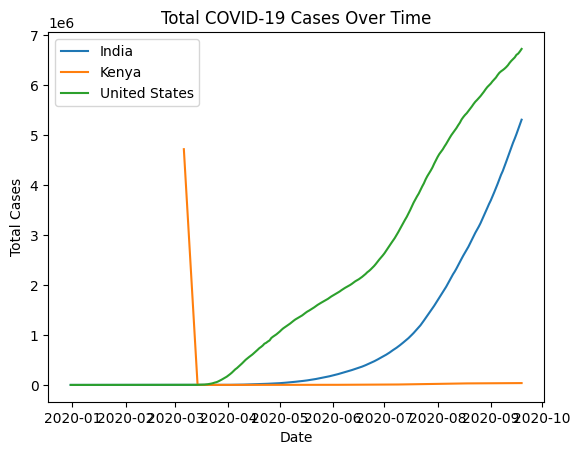

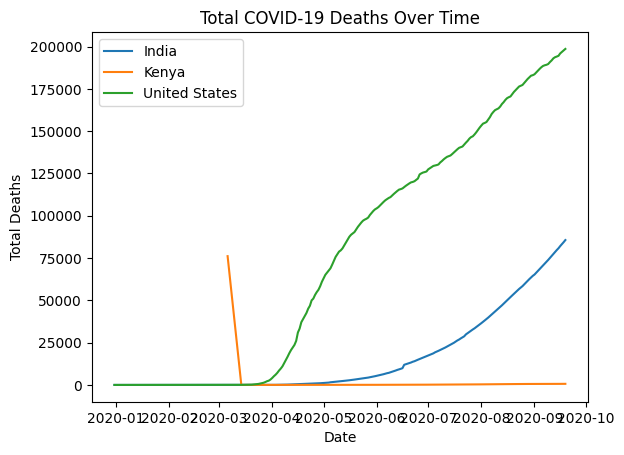

In [38]:

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.show()

for country in df['location'].unique():
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.show()

Bar charts (top countries by total cases).

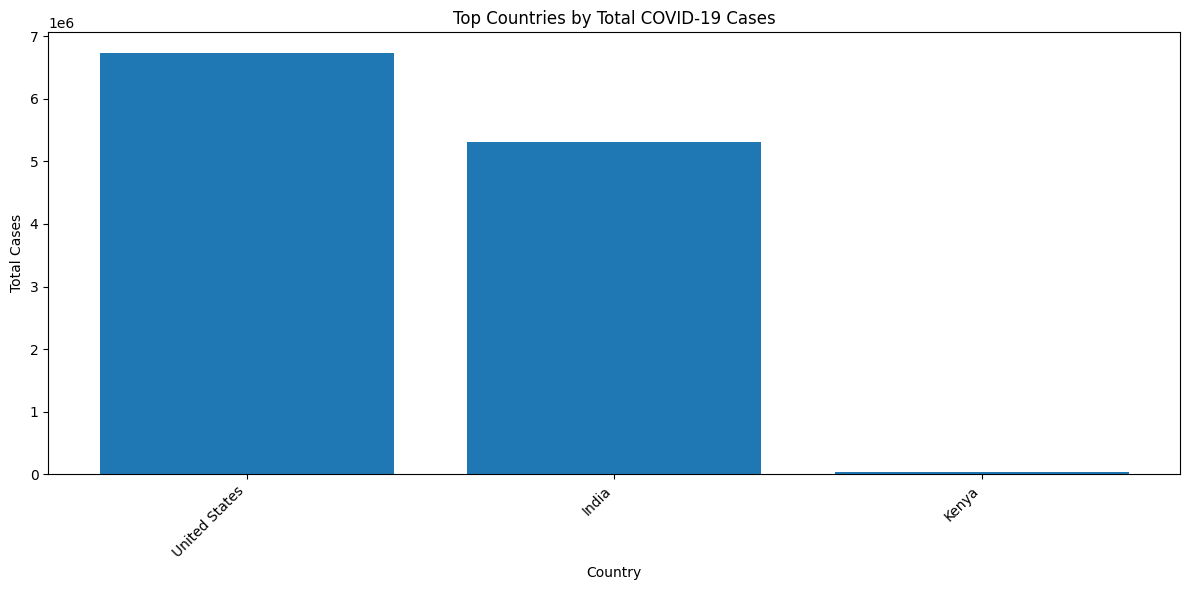

In [39]:

latest_data = df.loc[df.groupby('location')['date'].idxmax()]


top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries['location'], top_countries['total_cases'])
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top Countries by Total COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Heatmaps (optional for correlation analysis).

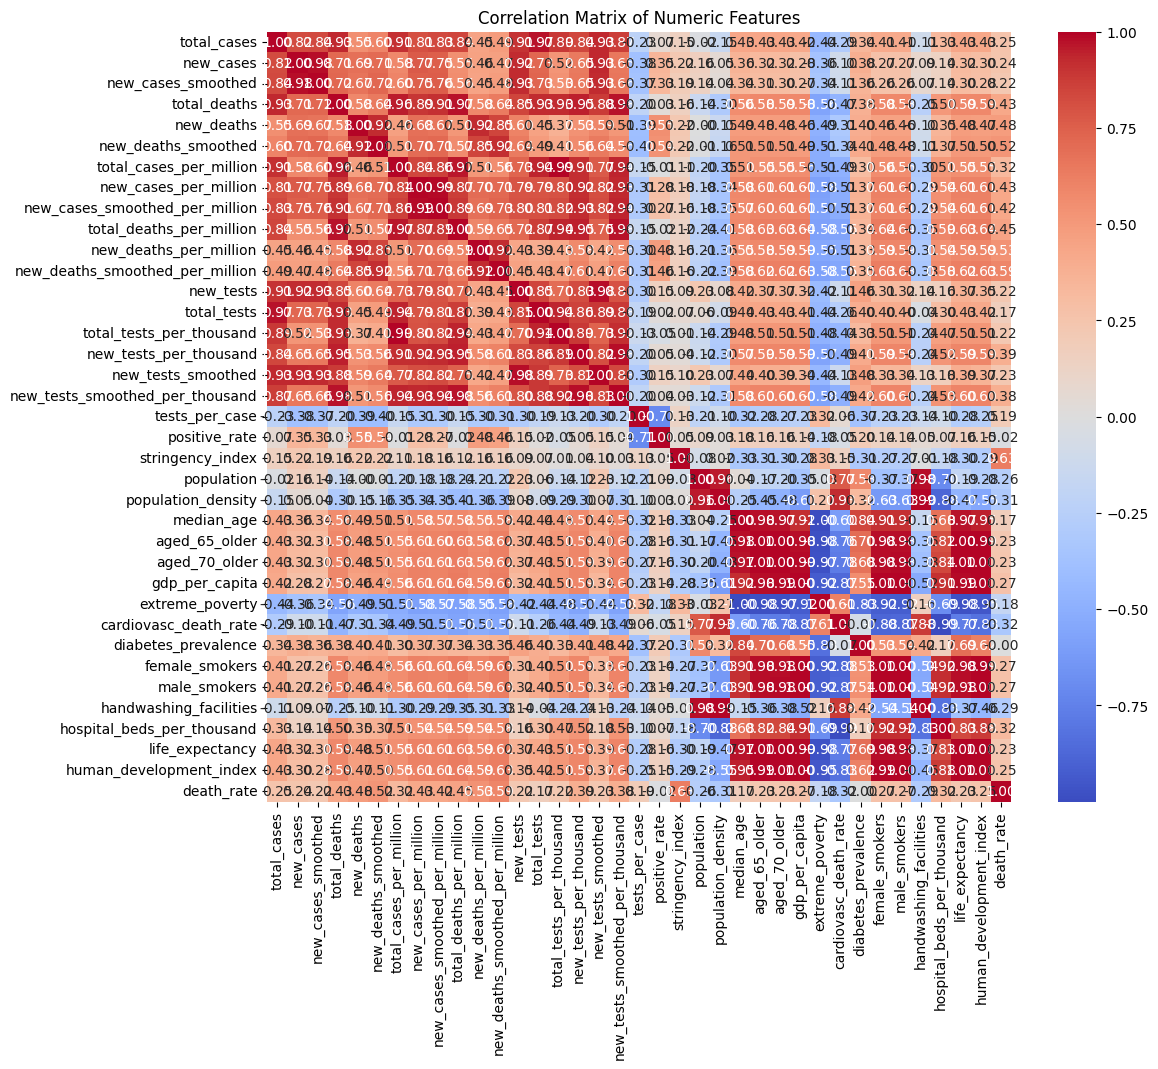

In [44]:


# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Visualizing Vaccination Progress**